# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [10]:
import os

In [11]:
os.getcwd()

'C:\\Users\\grace\\Downloads\\bioactivity-prediction-app-main\\bioactivity-prediction-app-main'

In [12]:
os.chdir('C:/Users/grace/Downloads/bioactivity-prediction-app-main/bioactivity-prediction-app-main')

In [13]:
df = pd.read_csv('Dopamine.csv')
df.head

<bound method NDFrame.head of      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0             1           1           1           0           0           0   
1             1           1           1           0           0           0   
2             1           1           1           0           0           0   
3             1           1           1           0           0           0   
4             1           1           1           0           0           0   
..          ...         ...         ...         ...         ...         ...   
832           1           1           1           0           0           0   
833           1           1           1           0           0           0   
834           1           1           1           0           0           0   
835           1           1           1           0           0           0   
836           1           1           1           0           0           0   

     PubchemFP6  Pubc

## **3. Input features**
The ***D2R*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [14]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
833,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
834,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
835,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [15]:
Y = df.pIC50
Y

0      7.301030
1      7.602060
2      6.443697
3      6.522879
4      7.154902
         ...   
832    8.823909
833    6.931814
834    7.392545
835    8.154902
836    7.954677
Name: pIC50, Length: 837, dtype: float64

In [16]:
Y = df.iloc[:,-1]
Y

0      7.301030
1      7.602060
2      6.443697
3      6.522879
4      7.154902
         ...   
832    8.823909
833    6.931814
834    7.392545
835    8.154902
836    7.954677
Name: pIC50, Length: 837, dtype: float64

### **3.4. Remove low variance features**

In [17]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP16,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP180,PubchemFP181,...,PubchemFP758,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP820,PubchemFP821,PubchemFP824
0,1,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1,0,0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
833,1,0,0,1,0,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,0
834,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
835,1,1,1,0,0,1,1,1,1,1,...,0,0,0,1,0,1,1,0,0,0


In [18]:
X.to_csv('descriptor_list.csv', index = False)

## **5. Building a Regression Model using Random Forest**

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8568612130809428

In [21]:
Y_pred = model.predict(X)
Y_pred

array([ 7.00753324,  7.04862082,  6.5267348 ,  6.61873967,  7.04862082,
        6.69086844,  7.32540137,  6.93901579,  6.53077384,  6.69086844,
        5.26370876,  6.48454986,  6.6940418 ,  6.69086844,  7.32540137,
        7.04862082,  6.02166168,  6.04433171,  5.9879858 ,  6.02166168,
        6.04433171,  6.11913   ,  5.9879858 ,  7.35523321,  7.13139754,
        6.06961439,  5.32253405,  7.26836221,  7.22696406,  7.91953594,
        7.35523321,  7.35523321,  7.84954393,  7.14476342,  7.87864033,
        8.20703209,  7.35523321,  7.35523321,  5.98781987,  7.26836221,
        6.99589651,  7.31660781,  7.35523321,  7.35523321,  7.23886405,
        6.73282721,  5.38006039,  7.90716169,  7.22696406,  7.22696406,
        7.91953594,  6.47783727,  7.35523321,  7.26836221,  7.69545944,
        7.667467  ,  7.21745473,  7.13139754,  6.87403383,  7.25572536,
        7.25857364,  6.2715078 ,  6.29151448,  7.00810548,  5.28876162,
        5.21220865,  5.28619031,  6.25381214,  5.61416218,  6.85

In [22]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.40
Coefficient of determination (R^2): 0.86


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

## Model Performance

In [23]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.40
Coefficient of determination (R^2): 0.86


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

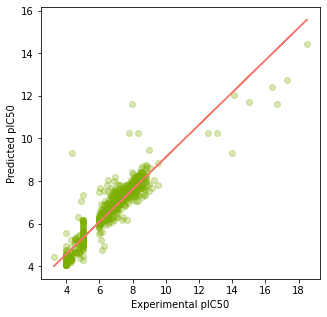

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [26]:
import pickle

In [27]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))